# Projet Machine Learning - Cdiscount - Ordinateur portable
- Scraping d'ordinateur portable sur le site de Cdiscount.
- Nettoyage des données
- Phase d'analyse et de modélisation

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

## Phase de Scraping
- Objectif : recupérer les caractéristiques et les prix des ordinateurs portable sur le site de Cdiscount.
- Difficulté majeure rencontrée : Le site Cdiscount est très peu organisé, difficile de récupérer de façon précise les données recherchées.
- Base de données brute récupérée ci-dessous :

In [2]:
brute = [json.loads(line) for line in open('brute1.json', 'r')]
df1 = pd.DataFrame(brute)

In [3]:
df1.head()

,prix,lien,nom,desc
0,625€00,https://www.cdiscount.com/informatique/ordinat...,"Apple MacBook Pro A1278 MD101 13.3"" Intel Core...","Apple MacBook Pro A1278 MD101 13.3"" Intel Core..."
1,1101€99,https://www.cdiscount.com/informatique/ordinat...,"ACER PC Portable Gamer Predator - 15,6"" FHD 14...","Processeur : Intel Core i5-9300H, Fréquence 2,..."
2,1039€99,https://www.cdiscount.com/informatique/ordinat...,MSI PC Portable - PRESTIGE 14 A10RB-018FR - 14...,Processeur : Intel Core i7 (10ème génération) ...
3,1459€99,https://www.cdiscount.com/informatique/ordinat...,"Apple - 13,3"" MacBook Pro Touch Bar (2020) - I...",Usage : Ultraportable & Performant\nProcesseur...
4,820€69,https://www.cdiscount.com/informatique/ordinat...,LENOVO ThinkBook 15-IIL - Core i5-1035G1 - 8 G...,Usage : Ultraportable & Performant\nProcesseur...


## Phase de nettoyage
- Une première phase de nettoyage pour récupérer les caractéristiques
- Une deuxième phase de nettoyage pour convertir les colonnes, et peaufiner le nettoyage pour rendre le DataFrame prêt à la modélisation.

In [4]:
import nettoyage_projet as ntp

In [5]:
propre = pd.read_csv("propre.csv", sep=",")

In [6]:
df = (
    propre
    .pipe(ntp.conversion_types)  
    .pipe(ntp.numerise_les_colonnes)
    .pipe(ntp.suppression_colonne)   
)

In [7]:
df.head()

,prix,proc,ram,marq
0,625,0,3,1
1,1101,0,2,3
2,1039,1,3,6
3,1459,0,2,1
4,820,0,2,2


1) Avec proc la variable contenant le type de processeur.


2) Avec marq la variable contenant la marque de l'ordinateur.


3) Et ram la variable contenant la mémoire vive de l'ordinateur.

In [8]:
df.dtypes

prix    Int64
proc    Int64
ram     int64
marq    Int64
dtype: object

## Statistiques descriptives

In [9]:
df.describe()

,prix,proc,ram,marq
count,1137.000000,1137.000000,1137.000000,1137.000000
mean,843.651715,0.493404,2.811785,2.856640
std,547.966744,0.838237,1.119498,2.106252
min,106.000000,0.000000,1.000000,0.000000
25%,468.000000,0.000000,2.000000,1.000000
50%,645.000000,0.000000,3.000000,2.000000
75%,1099.000000,1.000000,4.000000,4.000000
max,4924.000000,4.000000,4.000000,7.000000


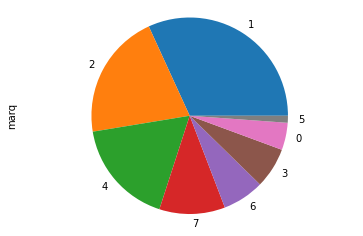

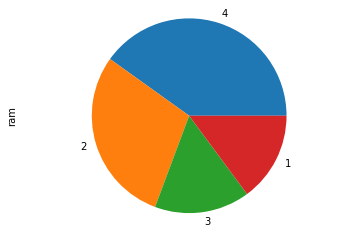

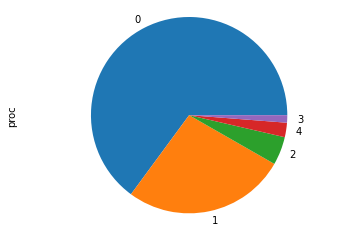

In [10]:
ntp.pie_chart(df)

Marque (marq) : 0 = Asus ; 1 = Apple ; 2 = Lenovo ; 3 = Acer ; 4 = Hp ; 5 = Huawei ; 6 = MSI ; 7 = Dell

- Apple est la marque sureprésentée dans l'échantillon.

Processeur (proc) :  0 = i5 ; 1 = i7 ; 2 = i3 ; 3 = AMD Ryzen 7; 4 = AMD Ryzen 5 ; 

- Intel Core i5 est le processeur majoritaire.

RAM : 0 = 2Go ; 1 = 4Go ; 2 = 8Go ; 3 = 16Go ; 4 = Pas d'info ;


- 8Go est la quantité de mémoire vive majoritaire dans l'échantillon. 

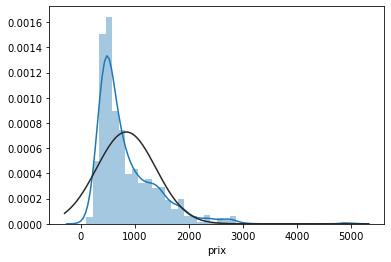

In [11]:
ntp.densité_prix(df)

Les prix ne suivent pas vraiment une distribution de la loi normale.

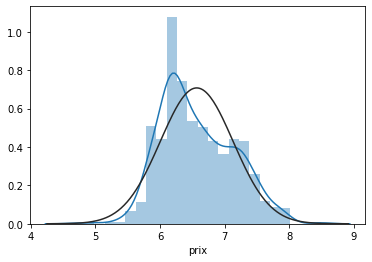

In [12]:
ntp.densité_log_prix(df)

Les prix suivent approximativement une distribution normale.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD79E99E80>,
      dtype=object)

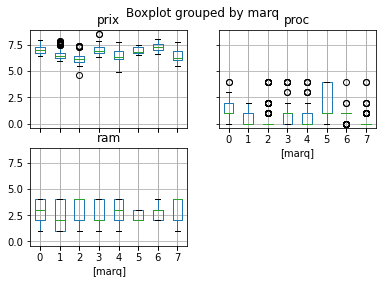

In [13]:
df.boxplot(by='marq')

MSI semble être la marque la plus onéreuse sur le site CDiscount, suivi de dell, Acer et Huawei. 

In [14]:
ntp.moyenne_par_groupe(df)

          prix      proc       ram
marq                              
0     7.048780  1.274510  2.882353
1     6.574745  0.265193  2.511050
2     6.198069  0.368644  3.148305
3     7.026963  1.105263  2.684211
4     6.476530  0.494949  2.767677
5     6.985546  2.000000  2.461538
6     7.317503  0.871795  2.820513
7     6.411961  0.300813  3.203252
          prix       ram      marq
proc                              
0     6.369916  2.792683  2.743902
1     7.059432  2.908197  3.104918
2     6.356406  2.509434  2.905660
3     6.888791  3.142857  2.285714
4     6.721588  2.666667  3.333333
         prix      proc      marq
ram                              
1    6.285821  0.378698  2.082840
2    6.707963  0.509036  2.825301
3    7.222511  0.783333  3.461111
4    6.314783  0.410088  2.927632


1) Les marques Dell, MSI, Acer et Huawei, ont les prix les plus élevés cela reste cohérent avec la boite à moustache précédente.


2) Intel Core i7 et AMD Ryzen 7 sont les processeurs qui ont les prix les plus élevés.


3) On remarque donc les ordinateurs ayant le plus de mémoire vive (16Go) ont les prix les plus élevés.

#### Transformation base de données utilisables pour les modèles.

In [15]:
df = (df.pipe(ntp.onehot_colonne_proc)
      .pipe(ntp.onehot_colonne_ram)
      .pipe(ntp.onehot_colonne_marq)
      .pipe(ntp.suppression_colonnes_inutiles_2))

In [16]:
df.head()

,prix,Intel Core i5,Intel Core i7,Intel Core i3,AMD Ryzen 7,AMD Ryzen 5,4 Go RAM,8 Go RAM,16 Go RAM,X Go RAM,Asus,Apple,Lenovo,Acer,Hp,Huawei,MSI,Dell
0,6.437752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.003974,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,6.946014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7.285507,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.709304,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Phase exploratoire

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['prix', 'Asus','Intel Core i3','X Go RAM'], axis=1).values
print("X shape:",X.shape)
y = df.prix.values
print("y shape:",y.shape)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

X shape: (1137, 14)
y shape: (1137,)


In [20]:
ntp.Trouver_meilleur_Random_Forest(X_tr, y_tr)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=50)


Le meilleur modèle est un Random forest, procédons à une évaluation plus complète du modèle.

## Evaluation du modèle

In [23]:
best_model = RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=50)

Model score 0.599056172207084
Mean Absolute Error (MAE): 0.278349954279007
Mean Squared Error (MSE): 0.13182314968446157
Root Mean Squared Error (RMSE): 0.36307457868110454
Mean Absolute Percentage Error (MAPE): 4.28
Accuracy: 95.72


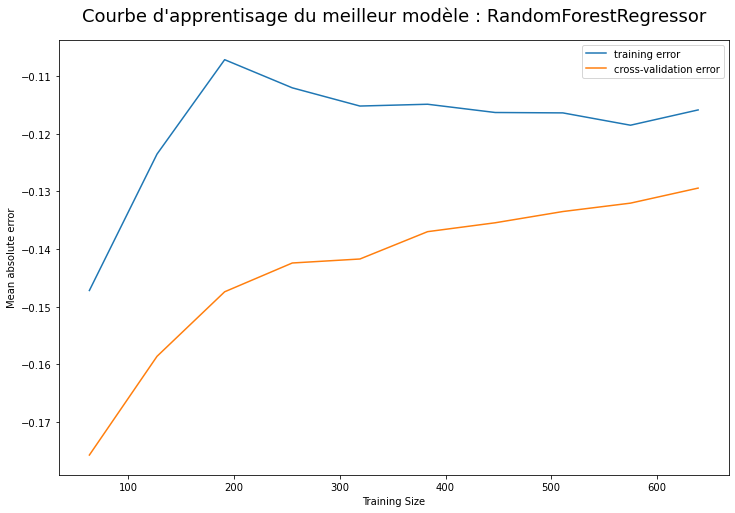

In [24]:
ntp.evaluation(best_model,X, y, X_tr, y_tr, X_te, y_te)

Comme le graphique l'illustre, le gap entre les deux courbes représente sur certaine variance des erreurs. On constate donc qu'une amélioration du modèle est possible, en ajoutant quelques variables comme par exemple la taille de l'écran.